In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import contingency_matrix
from scipy.special import comb

import pylab as pl
from sklearn.decomposition import PCA

In [20]:
# Make suitable changes here. My .csv file is in :  My Drive/Colab Notebooks
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/Colab Notebooks'
!pwd #Prints the present working directory

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks


In [21]:
def plotcluster(X, y, plot_name):
    # dimension reduction with PCA
    pca = PCA(n_components=2).fit(X)
    pca_2d = pca.transform(X)
    
    pl.title(plot_name)
    pl.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y)
    pl.show()

In [22]:
def Kmeansclustering(X, num_of_clusters):
    # Please refer to the page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    # Inputs: X is a N * M data matrix, where N denotes the number of data points, and M is the number of features
    #         num_of_clusters means the number of clusters
    # Output: the predicted labels for X, which is a vector with length N
    
    # IMPLEMENT THIS METHOD USING sklearn.cluster.KMeans
    kmean = KMeans()
    kmean.fit(X)
    y_pred = kmean.predict(X)

    return y_pred

In [23]:
def clustering_metrics(y_true, y_pred):
    # There are some links you need to use in yor implemantation:
    # contingency_matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html
    # scipy.special.comb: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html
    # numpy.amax: https://numpy.org/doc/stable/reference/generated/numpy.amax.html

    # obtain the contingency matrix using y_true and y_pred
    cm = contingency_matrix(y_true, y_pred)
    
    # rand index and F1
    # step 1: tp + fn
    tp_plus_fn = comb(cm.sum(1, dtype=int), 2).sum()
    # step 2: tp + fp
    tp_plus_fp = comb(cm.sum(0, dtype=int), 2).sum()
    # step 3: tp
    tp = comb(cm.astype(int), 2).sum()
    # step 4: fp, fn, tn
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(cm.sum(), 2) - tp - fp - fn
    # rand index
    rand_index = (tp + tn) / (tp + fp + fn + tn)
    # F1
    F1 = 2 * tp / (2 * tp + fp + fn)
    
    #-------------------
    # purity
    numerator = np.sum(np.amax(cm, axis=0))
    denominator = np.sum(cm)
    
    purity = numerator / denominator
    
    return rand_index, F1, purity

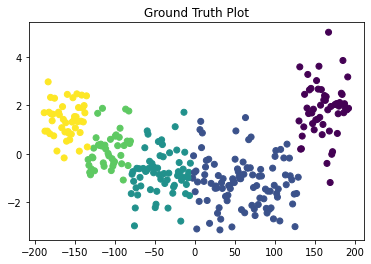

In [24]:
# main

# load data
# create X (features) and y (response)

X = pd.read_csv('train.csv')
y = pd.read_csv('train_labels.csv')['1'].astype('int64').values
plotcluster(X, y, 'Ground Truth Plot')
#print('# data =',len(X))

Kmeans: K = 4
Rand index = 0.8655399974618215
F1 = 0.6088240723647775
Purity = 0.8798701298701299


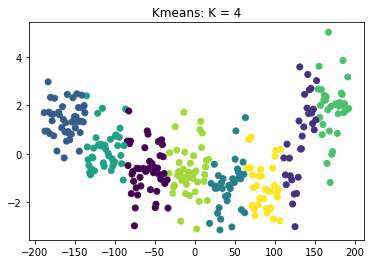

Kmeans: K = 5
Rand index = 0.862219214010745
F1 = 0.5989410171161187
Purity = 0.8766233766233766


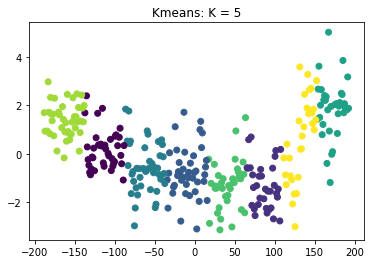

Kmeans: K = 6
Rand index = 0.8672321164177842
F1 = 0.6139368964880989
Purity = 0.8831168831168831


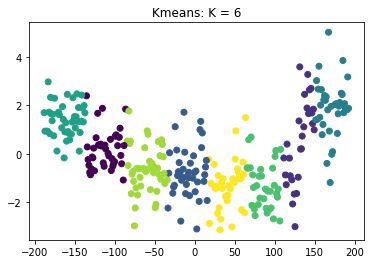

Kmeans: K = 7
Rand index = 0.8655399974618215
F1 = 0.6088240723647775
Purity = 0.8798701298701299


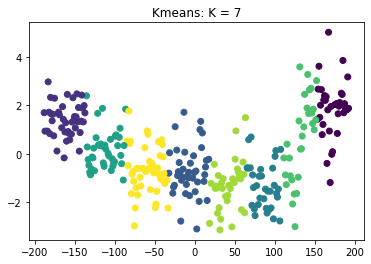

In [25]:
#Perform K-means clustering and evaluate performance

for num_of_clusters in range(4, 8):
    # Kmeans
    y_pred = Kmeansclustering(X, num_of_clusters)
    
    # evaluation metrics
    rand_index, F1, purity = clustering_metrics(y, y_pred)
    print('Kmeans: K =', num_of_clusters)
    print('Rand index =', rand_index)
    print('F1 =', F1)
    print('Purity =', purity)

    plotcluster(X, y_pred, 'Kmeans: K = ' + str(num_of_clusters))


In [26]:
print(clustering_metrics(y, y_pred))

(0.8655399974618215, 0.6088240723647775, 0.8798701298701299)
